In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
from sklearn.svm import SVC
import tensorflow as tf

[-286.66393588159656, 585.9790689499682, 333.37853701447625, -684.4657472419864]
[205.47662978933545, 872.9280652818477, 527.7185527472982, 264.6424138022667]


,x1cuad,x2cuad,x1,x2,y
0,11342.055043,911891.953638,-106.499085,954.930340,0
1,479318.313150,50544.235086,692.328183,-224.820451,0
2,301029.844456,162553.463683,-548.661867,-403.179195,0
3,273.852069,712053.186554,-16.548476,-843.832440,0
4,25659.502975,974281.377659,-160.185839,987.056927,0


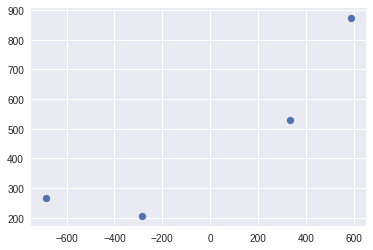

In [8]:
#Genero mi espacio
a = -1000
b = 1000
num = 10000


x1 = np.random.uniform(a,b,num)
x2 = np.random.uniform(a,b,num)


#Genero mis centros
centros1 = []
for i in range(4):
    c = np.random.uniform(a,b)
    centros1.append(c)

print(centros1)


centros2 = []
for i in range(4):
    c = np.random.uniform(a,b)
    centros2.append(c)

print(centros2)

plt.scatter(centros1,centros2) 

y=[]
r=200

for i in range(len(x1)):
    yy=0
    for j in range(len(centros1)):
        if (((x1[i]-centros1[j])**2+(x2[i]-centros2[j])**2)<r**2):
            yy=1
    y.append(yy)      
    



dat = []
for k in range (len(x1)):
    dat.append([x1[k]**2,x2[k]**2,x1[k],x2[k],y[k]])
    
dat = pd.DataFrame(dat,columns=['x1cuad','x2cuad','x1','x2','y'])
dat.head()


(-964.34815022833595,
 866.05032983775016,
 -34.988231742227114,
 1046.4734741936709)

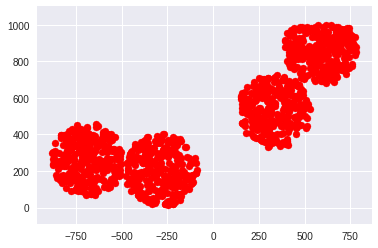

In [9]:
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red')
plt.axis("equal")

In [10]:
X=np.asarray(dat.iloc[:,0:4])
y=np.asarray(dat.iloc[:,4])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [11]:
from sklearn import preprocessing 
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predkn=knn.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predkn))
print(confusion_matrix(y_test,predkn))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2218
          1       0.97      0.98      0.98       282

avg / total       0.99      0.99      0.99      2500

[[2210    8]
 [   6  276]]


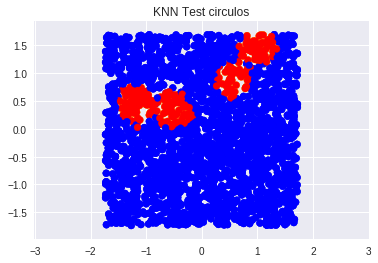

In [13]:
plt.scatter(X_test[:,2],X_test[:,3],color=['yellow' if i==1 else 'blue' for i in y_test])
plt.scatter(X_test[:,2],X_test[:,3],color=['red' if i==1 else 'blue' for i in predkn])
plt.axis('equal')
plt.title('KNN Test circulos')

**Con SVM**

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2218
          1       0.97      0.95      0.96       282

avg / total       0.99      0.99      0.99      2500

[[2210    8]
 [  15  267]]


(-1.9159162766167628,
 1.9052047365664908,
 -1.9275668755614423,
 1.884474027191114)

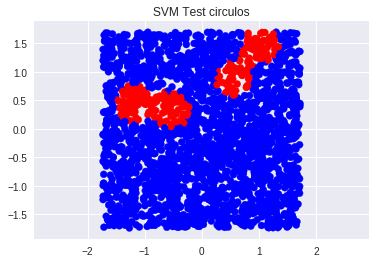

In [14]:
from sklearn.svm import SVC 
svmr=SVC(gamma=1,kernel='rbf',probability=True)
svmr.fit(X_train,y_train)
predr=svmr.predict(X_test) 
print(classification_report(y_test,predr))
print(confusion_matrix(y_test,predr)) 
plt.scatter(X_test[:,2],X_test[:,3],color=['red' if i==1 else 'blue' for i in predr])
plt.title('SVM Test circulos')
plt.axis('equal')

**Comparando**

In [15]:
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test,svmr.predict_proba(X_test)[:,1],pos_label=1)
fpr2, tpr2, thresholds2=roc_curve(y_test,knn.predict_proba(X_test)[:,1],pos_label=1)

In [16]:
svmr_auc=auc(fpr,tpr)
knn_auc=auc(fpr2,tpr2)

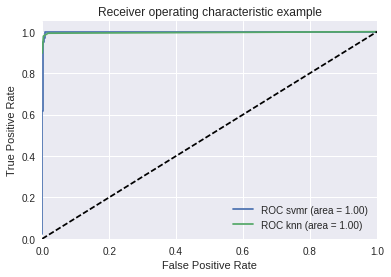

In [17]:
from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC svmr (area = %0.2f)' % svmr_auc)
plt.plot(fpr2, tpr2, label='ROC knn (area = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Ambas tienen una AUC parecida ligeramente mejor la de KNN pero usando el f1-score nos quedamos con este.

**Redes Neuronales**

In [18]:
input_size=4
hidden_layers=9
output_size=1

In [19]:
x=tf.placeholder(tf.float32,shape=[None,input_size])
y=tf.placeholder(tf.float32,shape=[None,output_size])

In [20]:
W1=tf.Variable(tf.random_uniform([input_size,hidden_layers])) 
W2=tf.Variable(tf.random_uniform([hidden_layers,output_size])) 
b1=tf.Variable(tf.zeros([hidden_layers])) 
b2=tf.Variable(tf.zeros([output_size]))

In [21]:
ini=tf.global_variables_initializer() 
sess=tf.InteractiveSession()
sess.run(ini)

In [22]:
z1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 
z2=tf.sigmoid(tf.add(tf.matmul(z1,W2),b2)) 
lossfn= tf.reduce_mean(( (y * tf.log(z2)) +  
  ((1 - y) * tf.log(1.0 - z2)) ) * -1) # cross entropy 
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(lossfn)

In [23]:
ini=tf.global_variables_initializer() 
with tf.Session() as sess:
    corrpred=tf.equal(tf.round(z2),y)
    acc=tf.reduce_mean(tf.cast(corrpred,tf.float32))
    #print(sess.run(acc,feed_dict={x:Xd,y:yd}))


In [26]:
sess.run(ini)
#while (sess.run(acc,feed_dict={x: Xd,y: yd})) != 1.0:
#    sess.run(train_step,feed_dict={x: Xd, y: yd})

for i in range(100000):
    sess.run(train_step, feed_dict={x: X_train, y: y_train.reshape(-1,1)})  

In [27]:
correct_prediction = tf.equal(tf.round(z2),y) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X_train, y: y_train.reshape(-1,1)})) # las corremos

0.958533


In [28]:
zz1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 

In [29]:
zz2=tf.sigmoid(tf.add(tf.matmul(zz1,W2),b2))

In [30]:
zx=sess.run(zz2,feed_dict={x:X_test})

In [31]:
dd=np.round(zx)
np.sum(dd)

235.0

(-1.9159162766167628,
 1.9052047365664908,
 -1.9275668755614423,
 1.884474027191114)

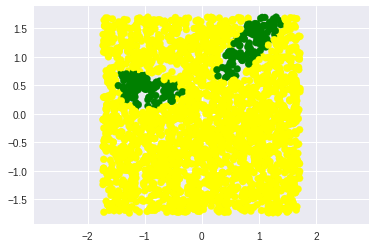

In [32]:
plt.scatter(X_test[:,2],X_test[:,3],color=['green' if i==1 else 'yellow' for i in dd]) 
#plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red',alpha=0.1)
plt.axis("equal")

In [33]:
 
print(classification_report(y_test,dd))
print(confusion_matrix(y_test,dd)) 

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2218
          1       0.89      0.74      0.80       282

avg / total       0.96      0.96      0.96      2500

[[2191   27]
 [  74  208]]


In [34]:
fpr3, tpr3, thresholds3=roc_curve(y_test,zx) 
nn_auc=auc(fpr3,tpr3)

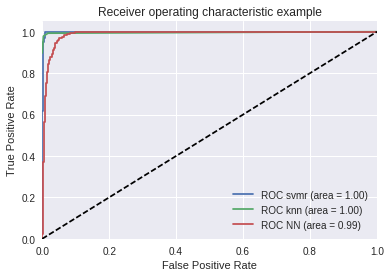

In [36]:
from sklearn.metrics import roc_curve, auc
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC svmr (area = %0.2f)' % svmr_auc)
plt.plot(fpr2, tpr2, label='ROC knn (area = %0.2f)' % knn_auc) 
plt.plot(fpr3, tpr3, label='ROC NN (area = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**El mejor es KNN  diferenciado por el f1-score**